In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv('data/winemag-data_first150k.csv')
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


### Fixing Rows and Columns

In [3]:
wine_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [4]:
# drop Unnamed: 0 column from dataframe
wine_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# remove regions_2 column, since similar column region_1 already there
wine_df.drop('region_2', axis='columns', inplace=True)

In [6]:
wine_df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'variety', 'winery'],
      dtype='object')

### Treating missing values

In [7]:
# check missing values in columns
wine_df.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
variety            0
winery             0
dtype: int64

In [8]:
# 1. drop records with country as null
wine_df=wine_df[~wine_df['country'].isnull()].copy()

In [9]:
wine_df.shape

(150925, 9)

In [10]:
wine_df.isnull().sum()

country            0
description        0
designation    45735
points             0
price          13695
province           0
region_1       25055
variety            0
winery             0
dtype: int64

In [11]:
# 2. Impute missing values in designation with most frequent category

In [12]:
# get most frequent designation using mode()
wine_df['designation'].mode()[0]

'Reserve'

In [13]:
# fill na with mode
wine_df['designation'].fillna(wine_df['designation'].mode()[0], inplace=True)

In [14]:
wine_df.isnull().sum()

country            0
description        0
designation        0
points             0
price          13695
province           0
region_1       25055
variety            0
winery             0
dtype: int64

In [15]:
# 3. Treat missing values of price column
# replace missing value with mean of price column

In [16]:
wine_df['price'].fillna(int(round(wine_df['price'].mean(), 0)), inplace=True)

In [17]:
wine_df.isnull().sum()

country            0
description        0
designation        0
points             0
price              0
province           0
region_1       25055
variety            0
winery             0
dtype: int64

In [18]:
wine_df.shape

(150925, 9)

In [19]:
# 4. Remove rows with region_1 having null values

In [20]:
wine_df = wine_df[~wine_df['region_1'].isnull()].copy()

In [21]:
wine_df.shape

(125870, 9)

In [22]:
# count number of duplicate rows
wine_df.duplicated().sum()

43951

In [23]:
# count number of non duplicates
(~wine_df.duplicated()).sum()

81919

In [24]:
# 5. Drop duplicates from dataframe
wine_df.drop_duplicates(inplace=True)

In [25]:
wine_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149634    False
149635    False
149637    False
149638    False
149639    False
Length: 81919, dtype: bool

In [26]:
# 6. The datatype of the price column is in float64 type which need to be
# converted into the int64 for data to be consistent.
wine_df['price']=wine_df['price'].astype(np.int64)
wine_df['price']

0         235
1         110
2          90
3          65
4          66
         ... 
149634     15
149635     15
149637      6
149638      9
149639      8
Name: price, Length: 81919, dtype: int64

### Univariate Analysis

#### Categorical Unordered Univariate Analysis:
If we take our data as an example, the province column in the dataset is divided into many sub-categories. There is no weight or measure given to any value in the ‘province’ column. Now, let’s analyze the province category by using plots. Since province is a category, we will plot the bar plot.

In [27]:
wine_df['province']

0               California
1           Northern Spain
2               California
3                   Oregon
4                 Provence
                ...       
149634              Alsace
149635          California
149637          California
149638    Mendoza Province
149639     Australia Other
Name: province, Length: 81919, dtype: object

<AxesSubplot:title={'center':'Bar Plot For Province'}, xlabel='Value Counts', ylabel='Provinces'>

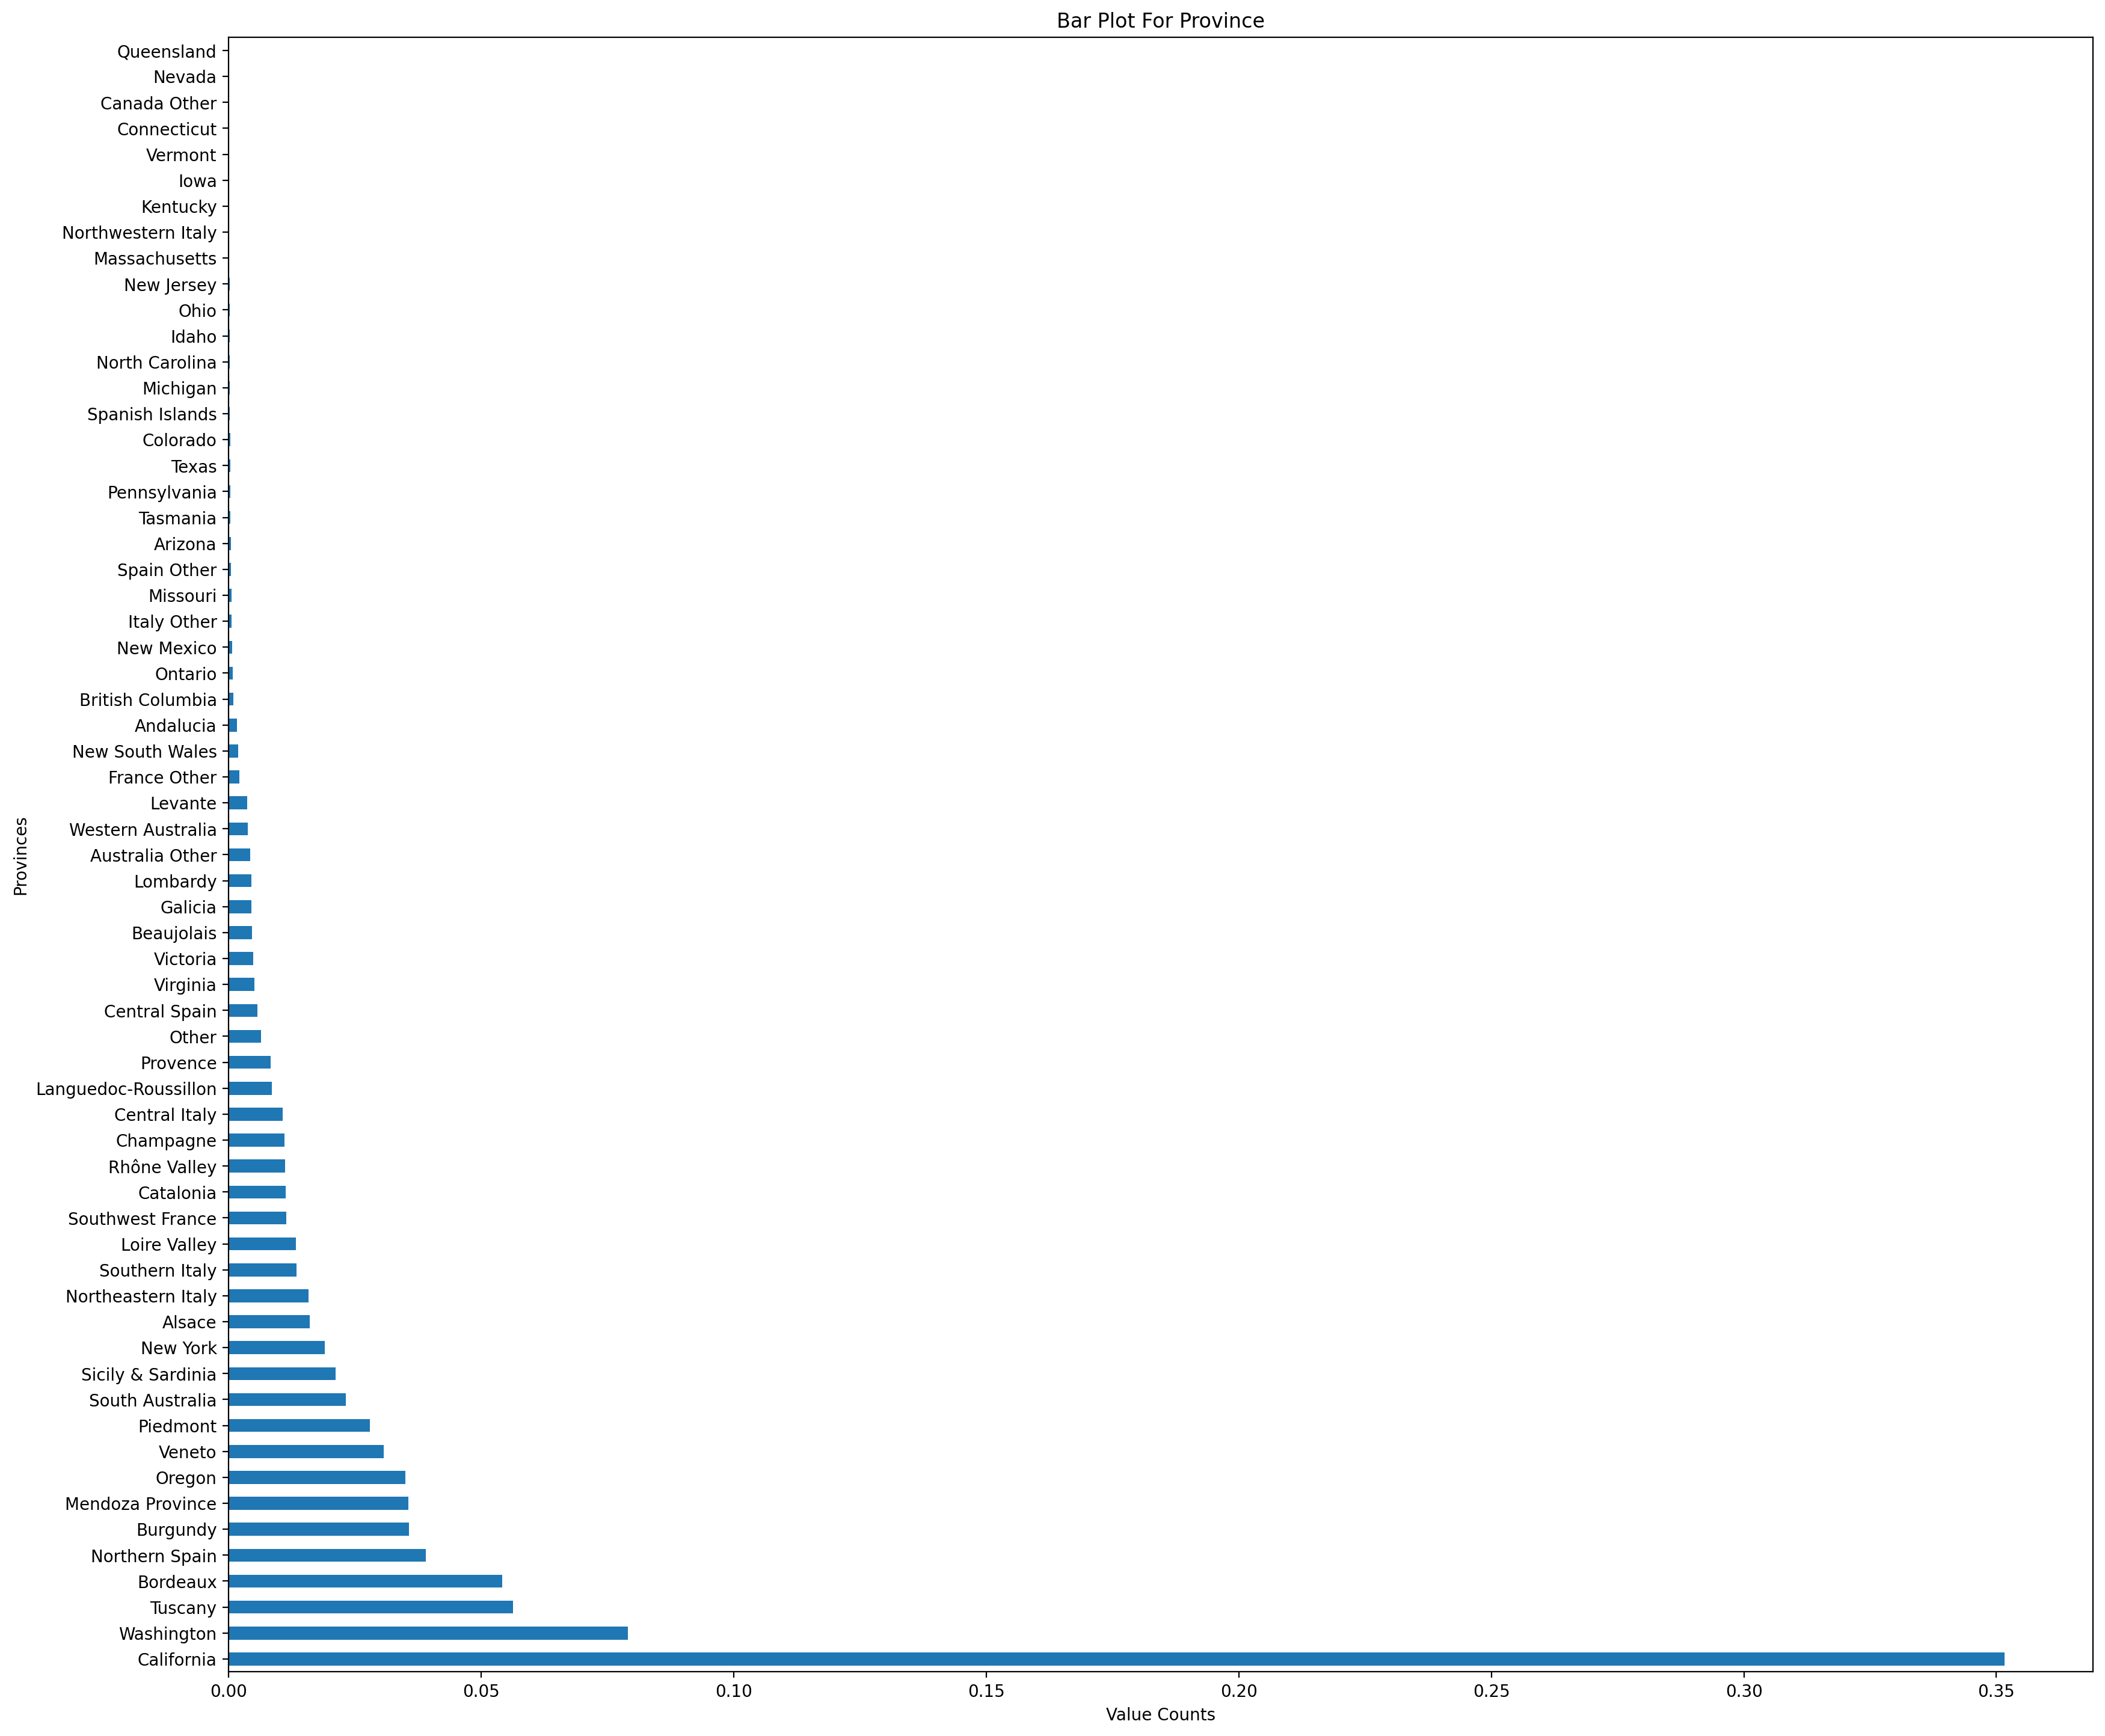

In [28]:
# get count of values in each column & normalize them
normalized_set = wine_df['province'].value_counts(normalize=True)

# plot in barplot
plt.figure(figsize=(20, 18), dpi=200)
plt.title('Bar Plot For Province')
plt.xlabel('Value Counts')
plt.ylabel('Provinces')
wine_df['province'].value_counts(normalize=True).plot.barh()

We can infer that california province have more wine shops compared to others

In [29]:
# Now let's infer variety category column from dataframe by piechart

<AxesSubplot:ylabel='variety'>

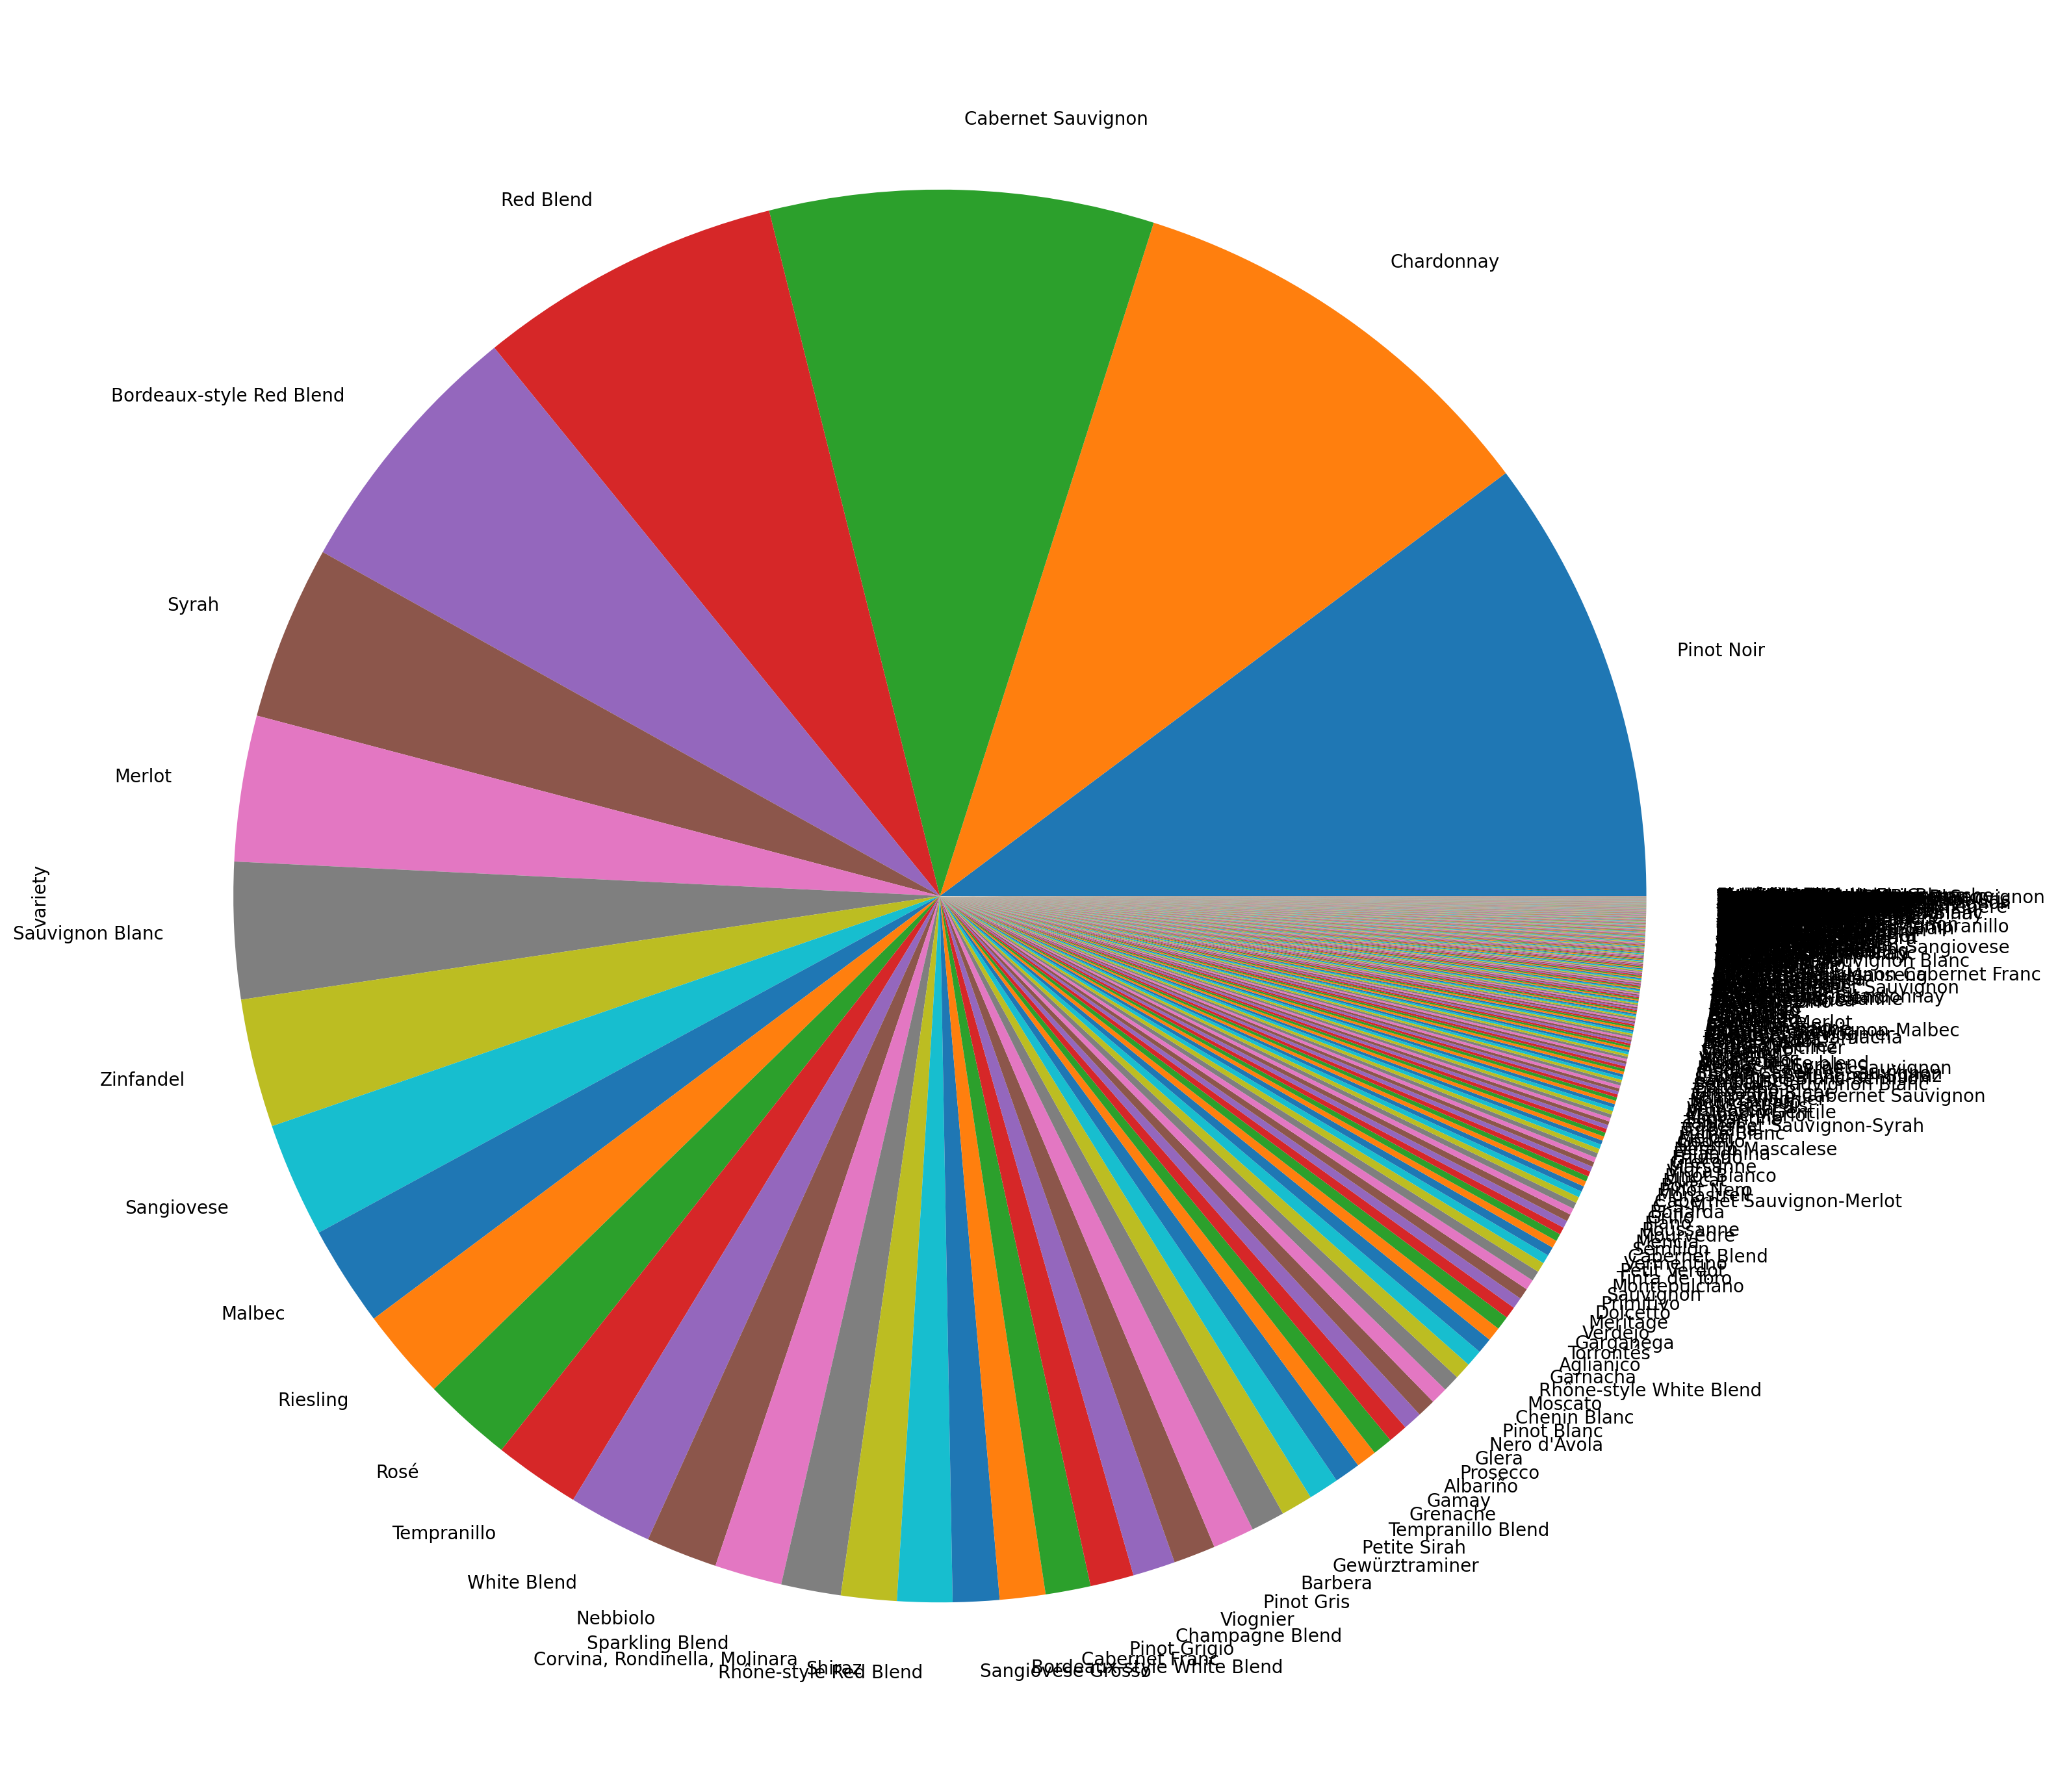

In [43]:
plt.figure(figsize=(20, 18), dpi=200)
# plt.show()
wine_df['variety'].value_counts().plot.pie()

From pie chart we can infer that a large number of wines belongs to Pinot Noir Variety.

Pinot Noir variety is slighlty higher than Chardonnay category.

In [33]:
wine_df.describe()

,points,price
count,81919.000000,81919.000000
mean,88.027735,34.909093
std,3.268133,36.526064
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


### Bivariate Analysis

#### Numeric-Numeric Analysis:

Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis

In [44]:
wine_df.head(3)

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90,California,Knights Valley,Sauvignon Blanc,Macauley


Analyze **points** and **price** column using scatter plot

In [45]:
wine_df[['points', 'price']]

,points,price
0,96,235
1,96,110
2,96,90
3,96,65
4,95,66
...,...,...
149634,84,15
149635,84,15
149637,84,6
149638,84,9


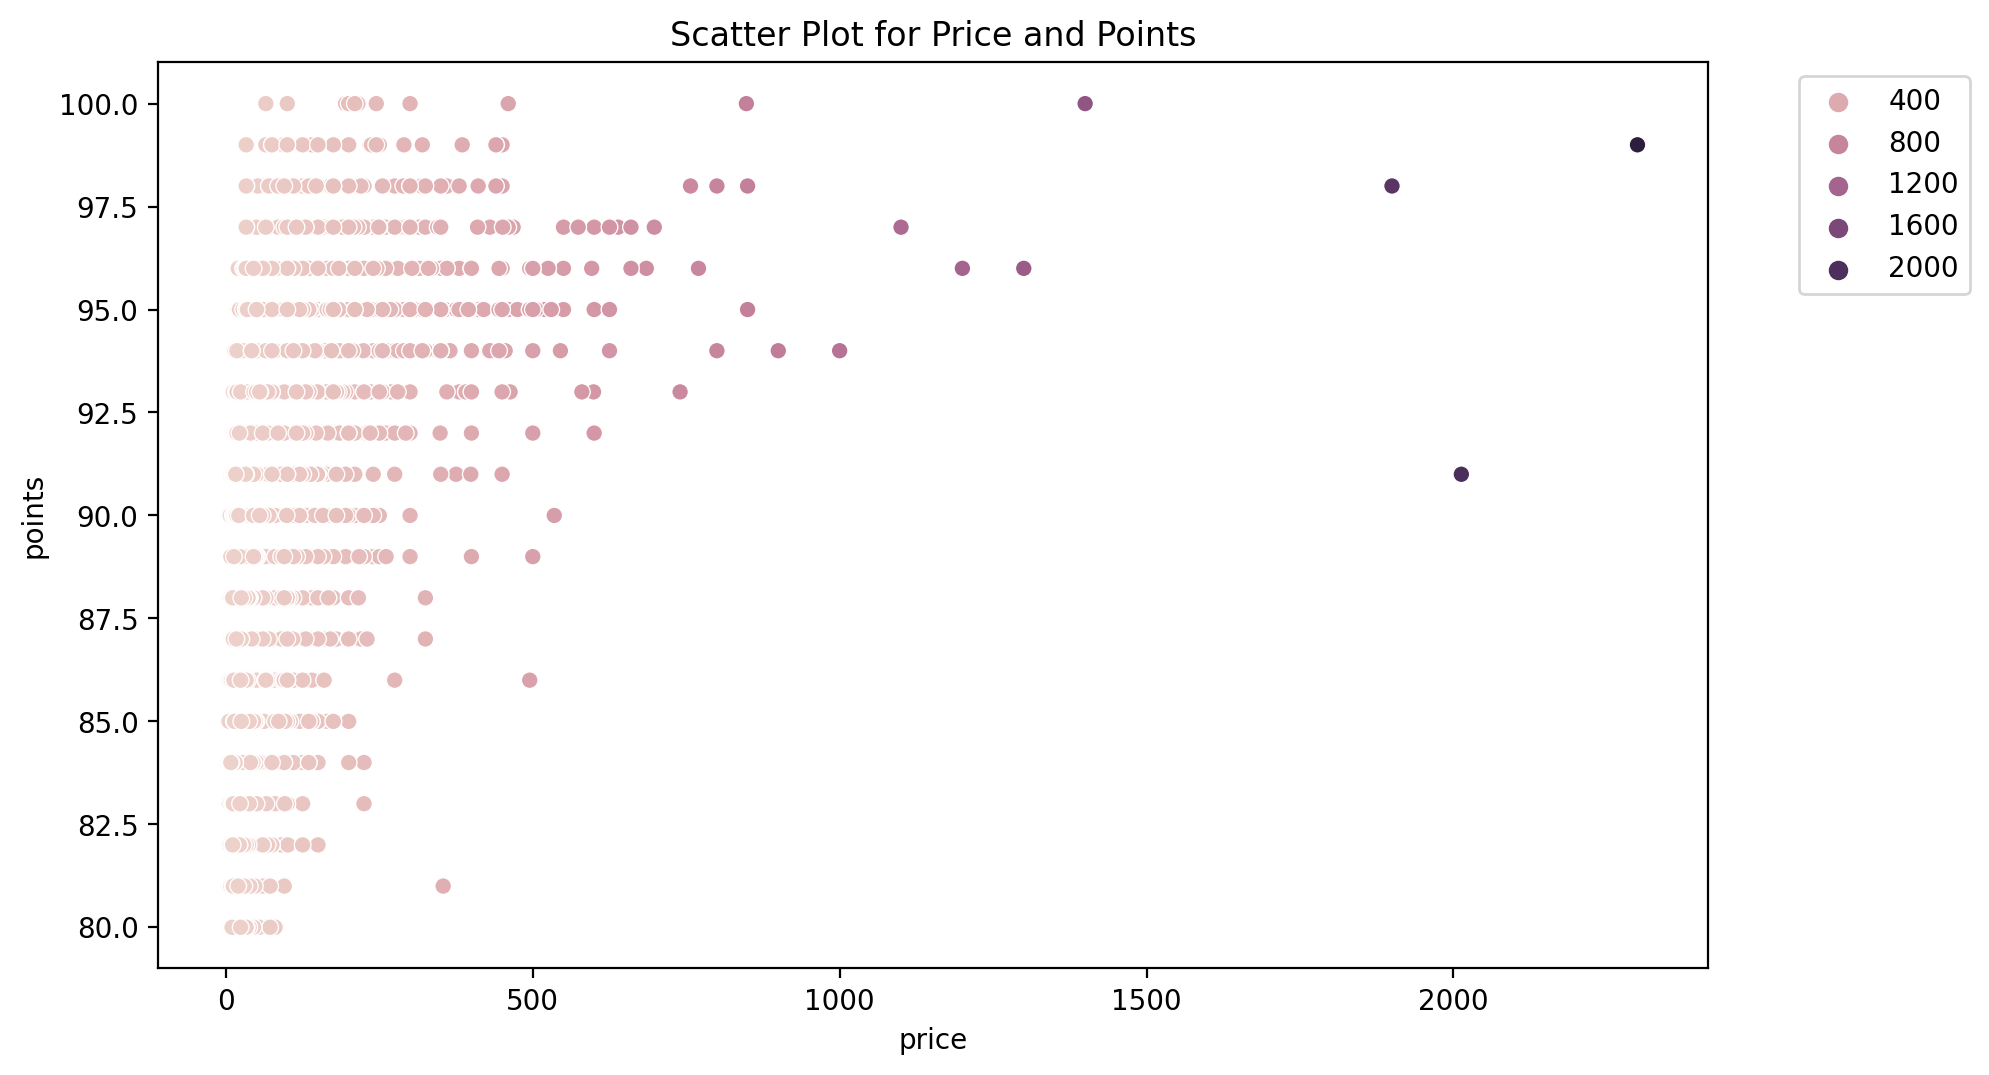

In [56]:
plt.figure(figsize=(10, 6), dpi=200)
plt.title('Scatter Plot for Price and Points')
sns.scatterplot(x='price', y='points', data=wine_df, hue="price")
plt.legend(bbox_to_anchor=(1.05, 1))

From this scatter plot, we can infer that as points increase price too becomes higher

#### Numeric-Categorical Analysis:

Analyzing a numeric variable and a categorical variable from a dataset. We analyze them mainly using mean, median, and box plots.

In [57]:
wine_df.head(2)

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez


We analyze regions and price. 

First apply groupby on regions_1 to get mean price. Thus getting mean price at each region.

In [70]:
# 1. Let's calculate mean value first
wine_df.groupby('region_1', as_index=False)['price'].mean()

,region_1,price
0,Abruzzo,31.166667
1,Adelaida District,49.304348
2,Adelaide,21.080000
3,Adelaide Hills,22.000000
4,Adelaide Plains,15.500000
...,...,...
1231,Yolo County,19.750000
1232,York Mountain,36.578947
1233,Yorkville Highlands,32.520833
1234,Yountville,51.880597


In [68]:
# 2. let's calculate the median price at each region.

In [69]:
wine_df.groupby('region_1', as_index=False).agg(median_price=('price', np.median))

,region_1,median_price
0,Abruzzo,29.0
1,Adelaida District,40.0
2,Adelaide,18.0
3,Adelaide Hills,20.0
4,Adelaide Plains,15.5
...,...,...
1231,Yolo County,18.5
1232,York Mountain,34.0
1233,Yorkville Highlands,29.0
1234,Yountville,48.0


In [71]:
# 3. lets draw a bar plot to show relationship b/w price and regions

<AxesSubplot:xlabel='region_1', ylabel='price'>

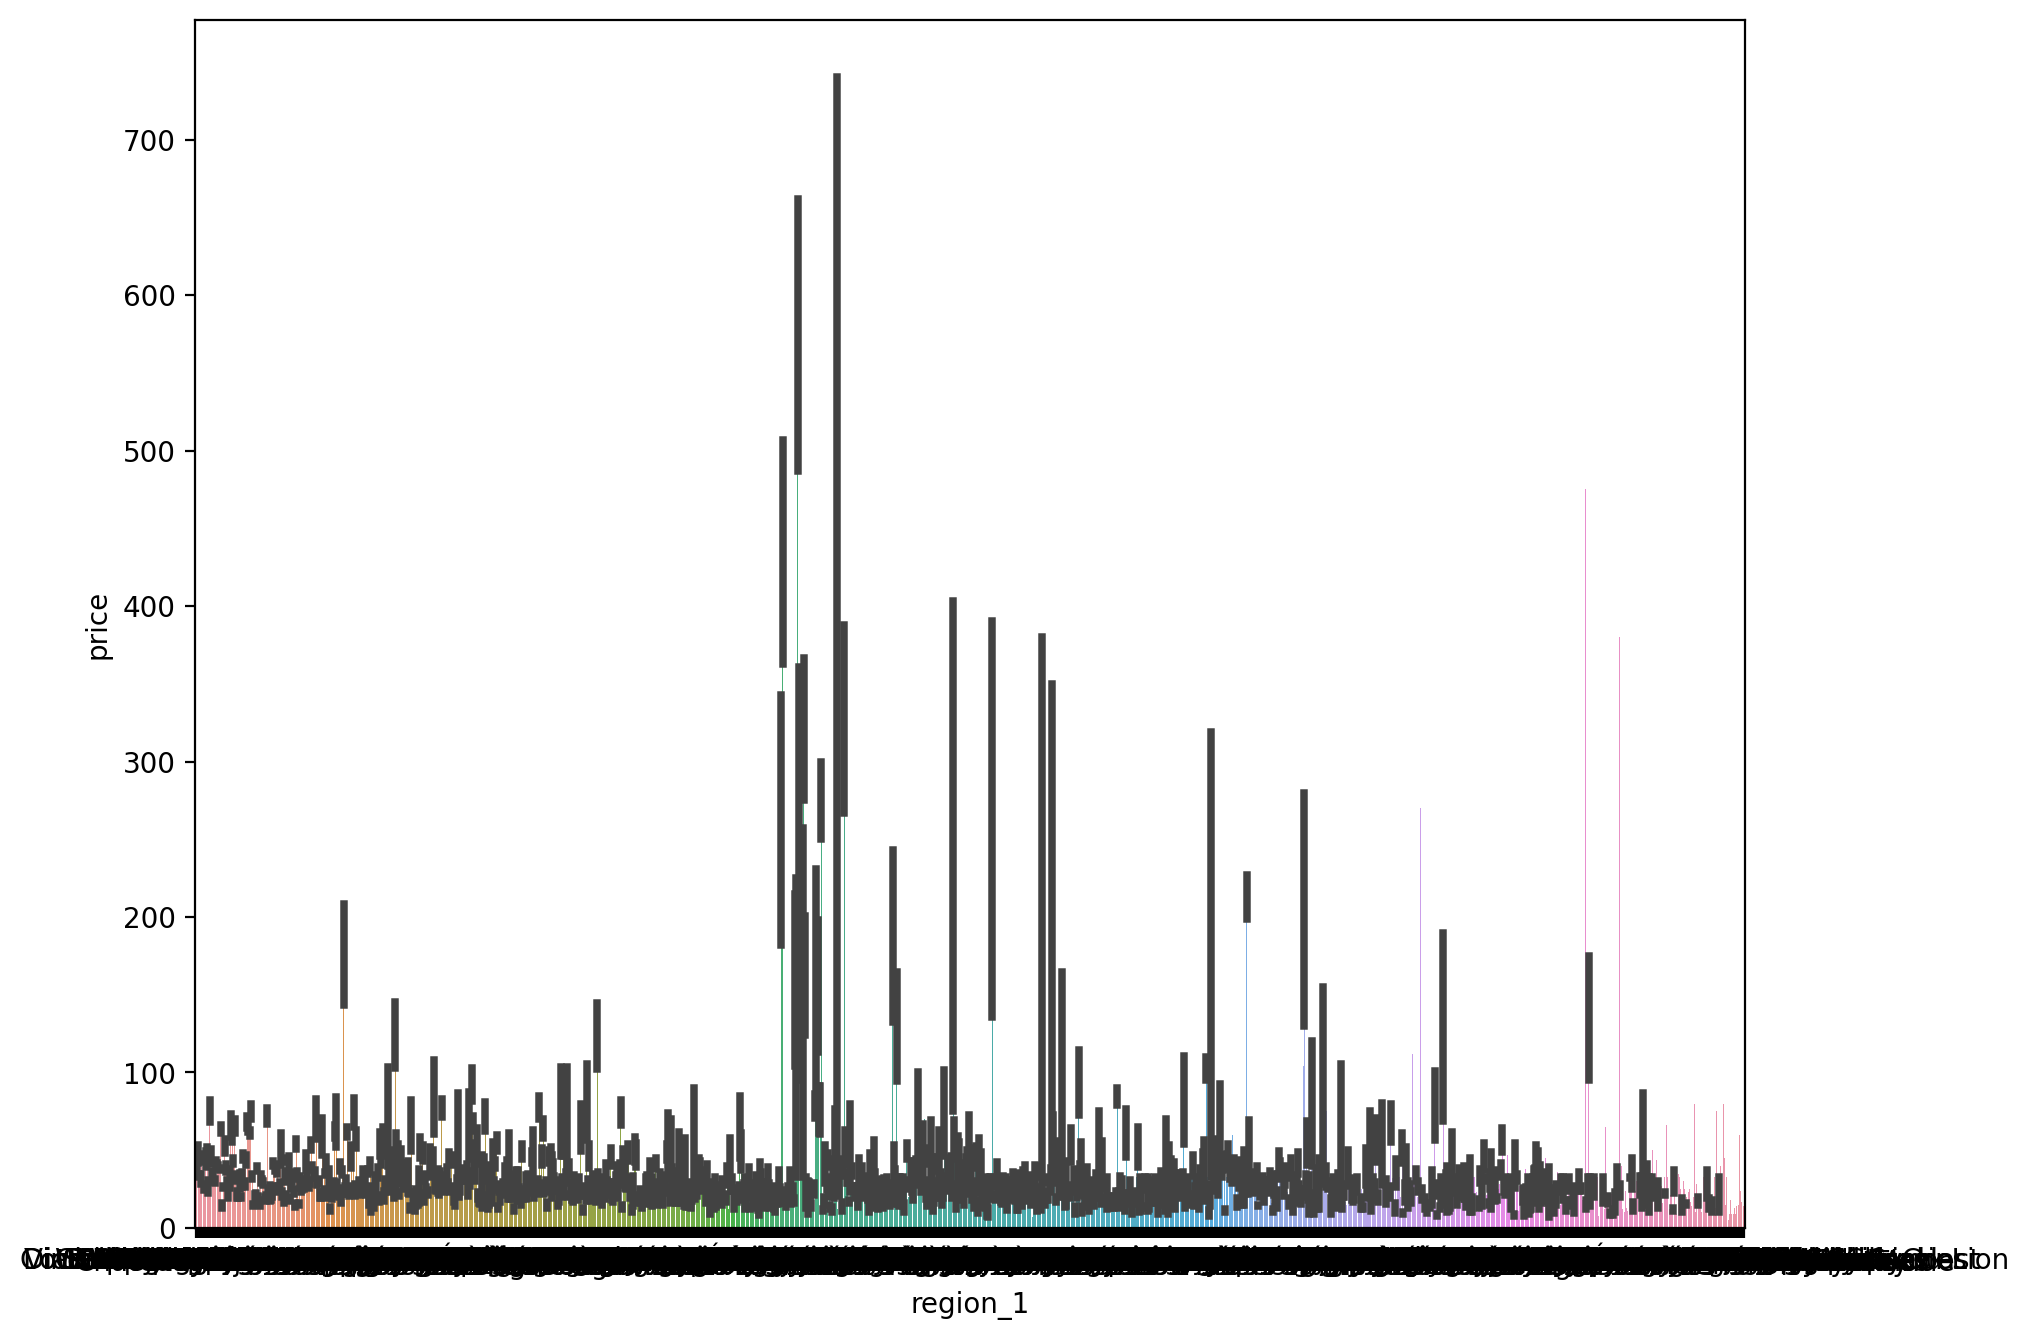

In [73]:
plt.figure(figsize=(10, 8), dpi=200)
sns.barplot(data=wine_df, x='region_1', y="price")